In [15]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from dict_net import *
from deep_dream import *
from helper_functions import *
import torchvision

In [16]:
num_labels = 200

In [17]:
model_name = "../models/net_200_0.001_40_0.0.pth"

In [18]:
net = DictNet(num_labels)

In [19]:
net

DictNet(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [20]:
net.load_state_dict(torch.load(model_name))

<All keys matched successfully>

In [21]:
dreamer = DeepDream(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True)

Device used to run this program:  cuda
Loading the network...
Network Loaded
Gaussian filter will be used


In [22]:
im,labels = dreamer.random_batch_dream(num_labels,4)

Dreaming...


In [23]:
label_to_word(labels)

['fulls', 'turin', 'xxiii', 'pests']

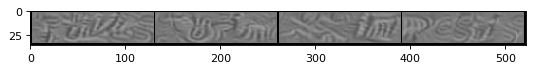

In [24]:
im = dreamer.batch_postProcess(im)

In [25]:
labels

[98, 194, 107, 10]

In [26]:
all_labels = [i for i in range(num_labels)]
dream_labels = random.sample(all_labels,100)

In [27]:
im_list = []
val_list = []
index_list = []
for label in dream_labels:
    im,val,index = dreamer(label=label,random_seed=label)
    im_list.append(im.cpu().detach().numpy())
    val_list.append(val.cpu().detach().numpy())
    index_list.append(index.cpu().detach().numpy())

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32),
 <a list of 10 Patch objects>)

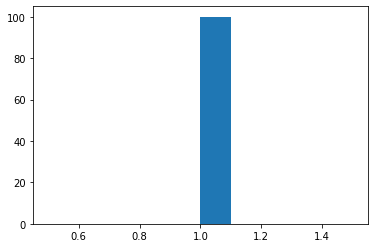

In [28]:
plt.hist(np.asarray(val_list))